# Modelos y métricas de evaluación

1. ¿Qué son las métricas de evaluación?
    - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
2. ¿Cómo usarlas?
    - Train/Test Split (No es como tal una métrica de evaluación)
    - Cross-Validation
    - R2
    - Mean Absolute Error
    - Root Mean Squared Error
    - ROC-AUC
3. ¿Cómo se comparan algunos de los modelos más comunes?
4. ¿Cómo es el input a una red neuronal?

## Melbourne Housing Market

- https://www.kaggle.com/anthonypino/melbourne-housing-market

Dataset donde vienen descripciones de viviendas en venta (o vendidas) en la ciudad de Melbourne, Australia, junto con sus respectivos precios. Vamos a ver si podemos predecir los precios de las casas.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/ramon/.conda/envs/data_science/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('./melbourne_housing_extra_data.csv')                 
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.00,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.00,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,NaN,585.0,NaN,Whittlesea,-37.67681,145.00323,Southern Metropolitan,4380.0
19736,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,...,2.0,2.0,NaN,333.0,NaN,Darebin,-37.75884,145.00264,Northern Metropolitan,2940.0
19737,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,2.0,2.0,1999.0,199.0,140.00,Darebin,-37.75948,144.99615,Western Metropolitan,6543.0
19738,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,2.0,1.0,2011.0,238.0,118.00,Hume,-37.70322,144.88236,Western Metropolitan,6543.0


In [3]:
df['Date'].dtype

dtype('O')

In [4]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df['Date'].dtype

dtype('<M8[ns]')

In [5]:
df.shape

(19740, 21)

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             8
Postcode             8
Bedroom2          4413
Bathroom          4413
Car               4413
Landsize          4796
BuildingArea     11123
YearBuilt        10389
CouncilArea       4444
Lattitude         4292
Longtitude        4292
Regionname           8
Propertycount        8
dtype: int64

In [7]:
# Eliminamos las filas que tengan NaN

df_dr = df.dropna().copy()

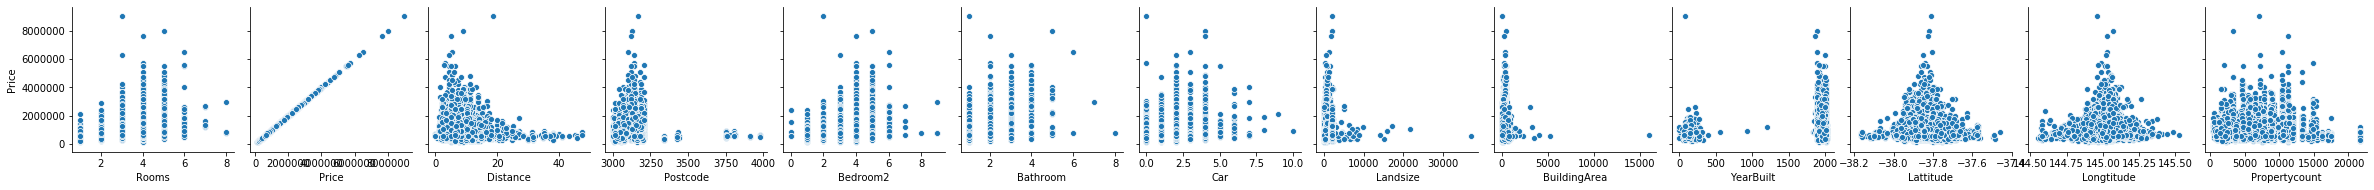

In [8]:
# Ahora vamos a intentar encontrar si las variables independientes tienen correlación 
# con nuestra variable dependiente

from pandas.api.types import is_numeric_dtype

sns.pairplot(df_dr, y_vars=['Price'], x_vars=[x for x in df_dr if is_numeric_dtype(df_dr[x])])

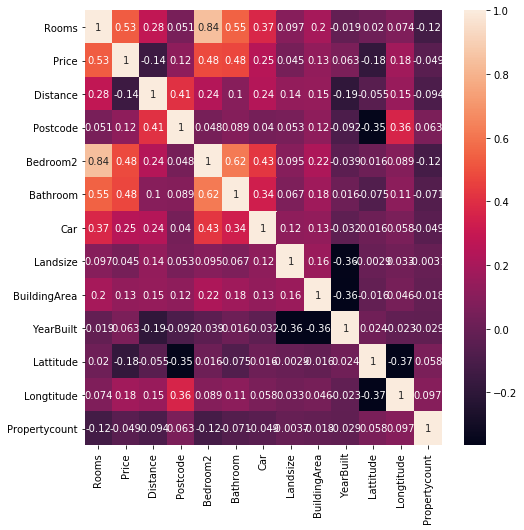

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_dr.corr(), annot=True)

In [10]:
df_dr['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [11]:
df_dr['Method'].unique()

array(['S', 'SP', 'VB', 'PI', 'SA'], dtype=object)

In [12]:
# Para agregar variables categóricas hay que convertirlas a variables binarias

suburb_dummies = pd.get_dummies(df_dr[['Type', 'Method']])

suburb_dummies.head(10)

,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
2,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,1
11,1,0,0,0,1,0,0,0
14,1,0,0,0,1,0,0,0
18,1,0,0,0,1,0,0,0
24,1,0,0,0,0,0,0,1
25,0,0,1,0,1,0,0,0
30,1,0,0,0,1,0,0,0
32,1,0,0,0,1,0,0,0


In [13]:
# Vamos a dropear las columnas que es muy probable que no tengan injerencia sobre el resultado
df_clean = df_dr.drop(["Address", "Date", "SellerG", "Suburb",
             "Type", "Method", "CouncilArea", "Regionname"], axis=1)

# Y vamos a unirlas con los dummies
df_clean = df_clean.join(suburb_dummies)

In [14]:
# Vamos a revolver nuestro dataset

from sklearn.utils import shuffle

df_shuffled = shuffle(df_clean)

In [15]:
# Separamos nuestro dataset en `X` (training data) y `y`(variable dependiente)

X = df_shuffled.drop(["Price"], axis=1)

y = df_shuffled['Price']

In [16]:
print(X.shape)
print(y.shape)

(6050, 20)
(6050,)


### Cross-Validation

- https://scikit-learn.org/stable/modules/cross_validation.html
- https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
scores = cross_val_score(lr, X, y, cv=5)

# A menos que sea específicado, la métrica de evaluación que se usa es la default del método
# `score` del estimador.

scores

array([0.53278097, 0.52021852, 0.55061405, 0.55932177, 0.55811071])

In [20]:
# Score promedio e intervalo de confianza del 95%:

print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precisión: 0.54 (+/- 0.03)


## R2

En este caso nuestro score nos está dando el R2:

- https://towardsdatascience.com/statistics-for-machine-learning-r-squared-explained-425ddfebf667

R2 nos dice el porcentaje de variación explicado por la relación entre las variables independientes y las dependientes. Varía entre 0 y 1. Es decir, entre más cerca de 1 más podemos explicar la variación de la variable dependiente usando nuestras variables independientes

In [21]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = lr.predict(X)

In [23]:
# Vamos a calcular nuestro R2 desde cero

def r2_score_for(ys_orig, ys_pred):
    ys_orig_mean = np.full(ys_orig.shape, ys_orig.mean())
    variance_to_prediction = get_variance_from(ys_orig, ys_pred)
    variance_to_mean = get_variance_from(ys_orig, ys_orig_mean)
    
    return np.divide((np.subtract(variance_to_mean, variance_to_prediction)), variance_to_mean)

def get_variance_from(ys_orig, ys_line):
    return np.divide(np.sum(np.power(np.subtract(ys_orig, ys_line), 2)), ys_orig.size)

In [24]:
r_squared = r2_score_for(y, y_pred)

print(r_squared)

0.556665150859325


In [25]:
from sklearn.metrics import r2_score

print(r2_score(y, y_pred))

0.556665150859325


## Red Neuronal

- MLPRegressor: Perceptrón multicapa que entrena con backpropagation

In [28]:
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
1085,3,9.2,3104.0,3.0,2.0,3.0,763.0,168.0,1960.0,-37.79350,145.08650,7809.0,1,0,0,0,0,0,0,1
6118,5,7.5,3102.0,5.0,3.0,2.0,695.0,360.0,1950.0,-37.79040,145.05480,2671.0,1,0,0,0,0,0,0,1
4435,2,6.4,3011.0,2.0,2.0,1.0,0.0,78.0,2013.0,-37.80250,144.90730,7570.0,0,0,1,0,1,0,0,0
14960,3,19.6,3076.0,3.0,1.0,4.0,699.0,118.0,1988.0,-37.65105,145.04613,10926.0,1,0,0,0,1,0,0,0
17226,2,3.5,3207.0,2.0,1.0,0.0,181.0,105.0,1880.0,-37.83661,144.93359,8648.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,2,4.5,3181.0,2.0,1.0,1.0,88.0,121.0,2000.0,-37.85030,144.99130,7717.0,1,0,0,1,0,0,0,0
1218,2,13.0,3204.0,2.0,1.0,1.0,140.0,250.0,1970.0,-37.92040,145.04430,6795.0,0,1,0,0,1,0,0,0
688,4,12.2,3147.0,2.0,2.0,2.0,621.0,203.0,2000.0,-37.86470,145.10230,2894.0,1,0,0,0,1,0,0,0
6971,3,14.6,3189.0,3.0,2.0,1.0,164.0,123.0,2010.0,-37.93780,145.03850,2555.0,0,1,0,1,0,0,0,0


In [29]:
y

1085     1700000.0
6118     2100000.0
4435      571000.0
14960     540000.0
17226    1335000.0
           ...    
7947      950000.0
1218      851000.0
688      1500000.0
6971      750000.0
3352     1136000.0
Name: Price, Length: 6050, dtype: float64

In [26]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 3), learning_rate='adaptive',
                            max_iter=10000)

mlp_regressor.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 3), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [27]:
mlp_regressor.score(X, y)

0.6059957762388136